<H1> Word frequency changes in congressional records with term frequency–inverse document frequency (TF-IDF) analysis </H1> 

In [1]:
library(readr)
raw.corpus <- read_csv("~/Downloads/CongRec/speech_w_data.csv")

Parsed with column specification:
cols(
  speech_id = col_integer(),
  date = col_integer(),
  congress_id = col_integer(),
  chamber = col_character(),
  party = col_character(),
  speech = col_character()
)


In [21]:
library(tidyverse)

# compare word usage between the (H)ouse and the (S)enate in the 114th congress

unit1 <- raw.corpus %>%
    filter(party == 'R', chamber == 'H', congress_id == 114) %>%
    select(speech_id, speech)

unit2 <- raw.corpus %>%
    filter(party == 'D', chamber == 'H', congress_id == 114) %>%
    select(speech_id, speech)

In [22]:
library(tidytext)

#compute tf-idf of each corpus (document = speeche)
unit1.dt <- unit1 %>%
    unnest_tokens(word, speech) %>%
    mutate(word = str_extract(word, "[a-z']+")) %>%
    count(speech_id, word, sort = TRUE) %>%
    bind_tf_idf(word, speech_id, n)

unit2.dt <- unit2 %>%
    unnest_tokens(word, speech) %>%
    mutate(word = str_extract(word, "[a-z']+")) %>%
    count(speech_id, word, sort = TRUE) %>%
    bind_tf_idf(word, speech_id, n) 


In [23]:
#for each topic consider only k most dominant words

k = 7

counts1 <- unit1.dt %>% 
  arrange(desc(tf_idf)) %>%
  #filter(speech_id < 1110000050) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>% 
  group_by(speech_id) %>% 
  top_n(k) %>% 
  ungroup %>%
  count(word, sort = TRUE)

counts2 <- unit2.dt %>% 
  arrange(desc(tf_idf)) %>%
  #filter(speech_id < 1110000050) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>% 
  group_by(speech_id) %>% 
  top_n(k) %>% 
  ungroup %>%
  count(word, sort = TRUE)
    

Selecting by tf_idf
Selecting by tf_idf


In [24]:
source("./HC_aux.R")

two.counts <- counts1 %>% 
    inner_join(counts2, by = 'word') %>%
    mutate(total.x = sum(nn.x), total.y = sum(nn.y)) %>%
    mutate(total = nn.x + nn.y) %>%
    filter(total > 10) %>%
    rowwise() %>%
        mutate(p = (nn.x+nn.y) / (total.x + total.y)) %>%
        mutate(se = sqrt(p*(1-p)*(1/total.x + 1/ total.y))) %>%
        mutate(z.score = (nn.x /total.x - nn.y / total.y) / se) %>%
        mutate(pval = 2*pnorm(-abs(z.score))) %>%
    dplyr::select(word, nn.x, nn.y, pval, total.x, total.y) 
    
hc = hc.vals(two.counts$pval, alpha = 0.5)
hc$hc.star
HC <- data_frame(uu = hc$uu, zz = hc$z, pp = hc$p.sorted, word = two.counts$word[hc$p.sorted_idx])

Warning message:
“Column `word` joining factors with different levels, coercing to character vector”

[1] 16.68517

In [25]:
two.counts %>%
    arrange(desc(pval)) %>%
    top_n(-20)

Selecting by total.y


word,nn.x,nn.y,pval,total.x,total.y
irans,35,39,0.9981285,23204,25870
poor,9,10,0.9940968,23204,25870
report,9,10,0.9940968,23204,25870
choices,9,10,0.9940968,23204,25870
navy,9,10,0.9940968,23204,25870
corridor,9,10,0.9940968,23204,25870
wildlife,18,20,0.9916500,23204,25870
poe,8,9,0.9851810,23204,25870
unions,8,9,0.9851810,23204,25870
pregnancy,8,9,0.9851810,23204,25870


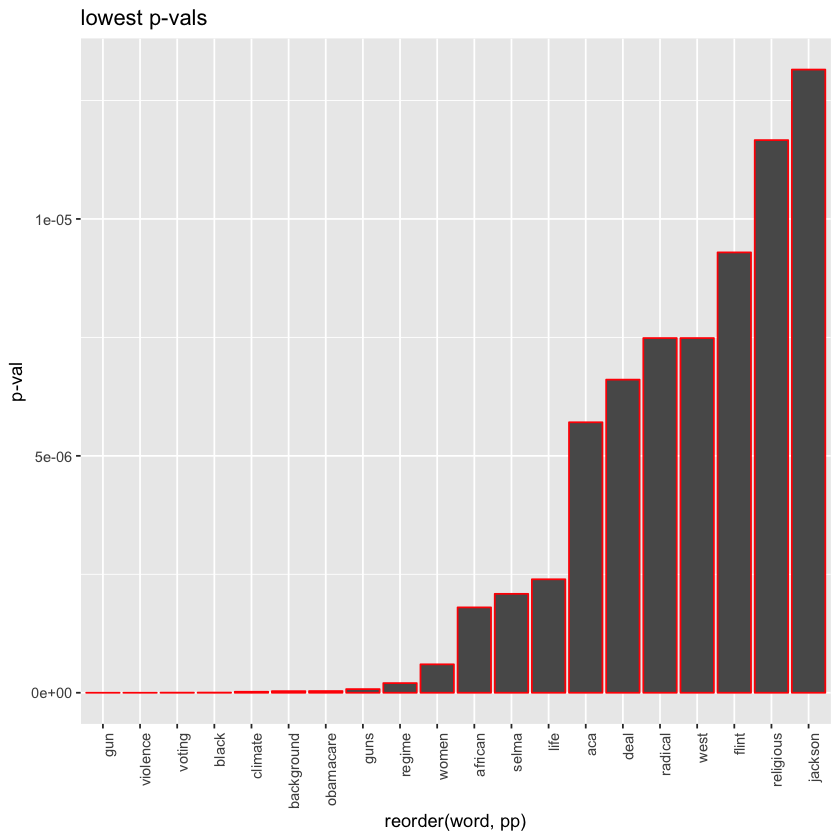

In [26]:
#lowest p-values 
#HC %>% arrange(desc(pp)) %>% top_n(-20, pp) 

HC %>%
    top_n(-20, pp) %>%
    ggplot(aes(reorder(word, pp), pp)) + 
    geom_col(colour = 'red') + 
    ylab('p-val') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ggtitle("lowest p-vals")